In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from matplotlib.gridspec import GridSpec
from scipy.special import boxcox1p

warnings.filterwarnings("ignore")


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score


from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [2]:
company_data = pd.read_csv("Company_data.csv")
company_data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [3]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
numerical_feature = company_data.describe(include=["int64", "float64"]).columns

print(list(numerical_feature))


['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


In [5]:
categorical_feature = company_data.describe(include=["object"]).columns

print(list(categorical_feature))

['ShelveLoc', 'Urban', 'US']


Index(['ShelveLoc', 'Urban', 'US'], dtype='object')


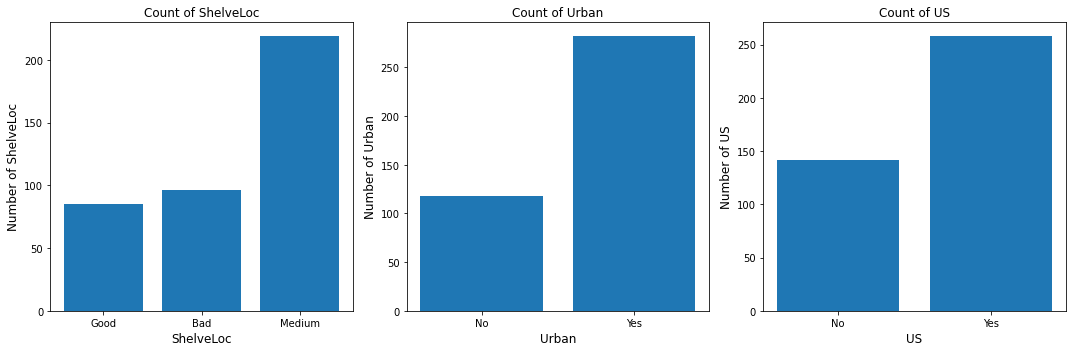

In [6]:
print(categorical_feature)


plt.figure(figsize=(15, 5))
for idx, column in enumerate(categorical_feature):
    df = company_data.copy()
    unique = df[column].value_counts(ascending=True);
 
    plt.subplot(1, 3, idx+1)    
    plt.title("Count of "+ column)
    plt.bar(unique.index, unique.values);
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
    
plt.tight_layout()
plt.show() 

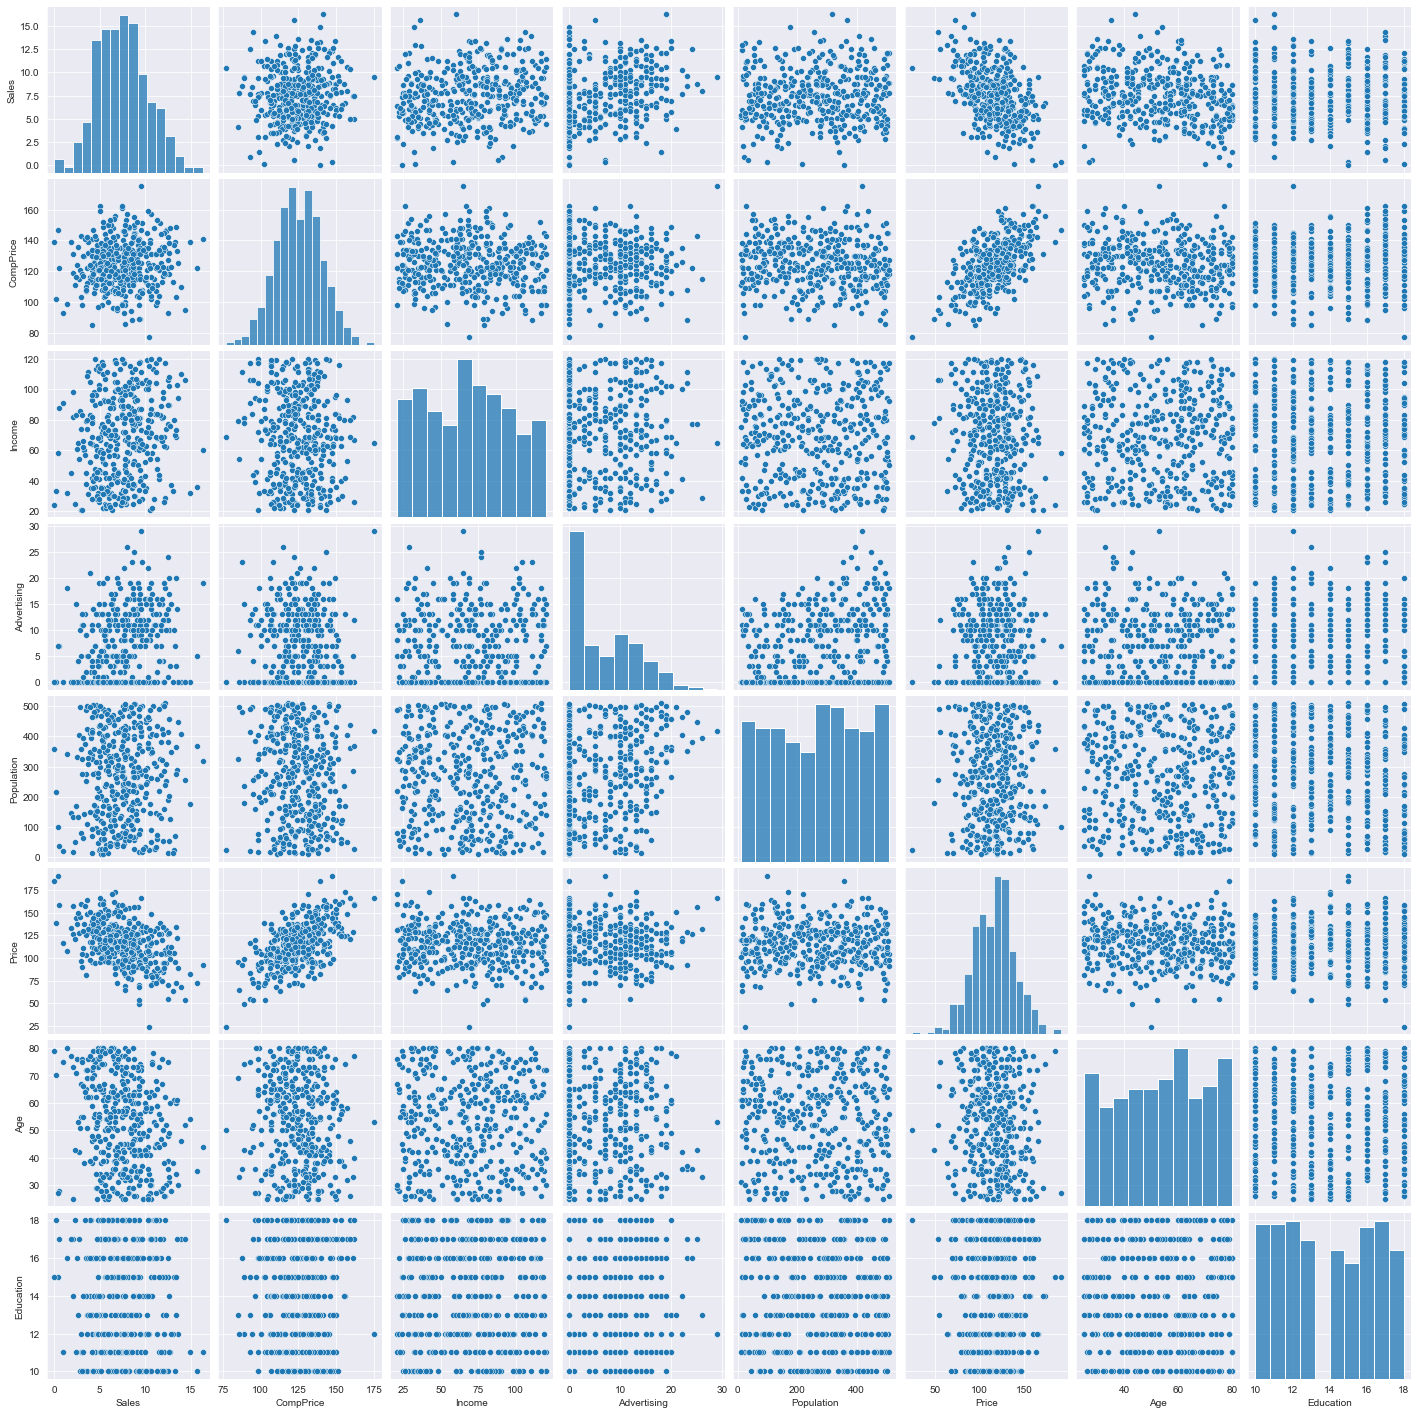

In [7]:
sns.set_style('darkgrid')
sns.pairplot(company_data[numerical_feature])
plt.show()


In [8]:
def boxplot(x_param, y_param):
    plt.figure(figsize=(15,8))
    sns.boxplot(x=x_param, data=company_data,y=y_param, palette = "dark")
    plt.xlabel('\n'+ x_param)
    plt.ylabel(y_param + '\n')
    plt.title("parameter " + x_param + " vs " + y_param + " relation")
    plt.show()

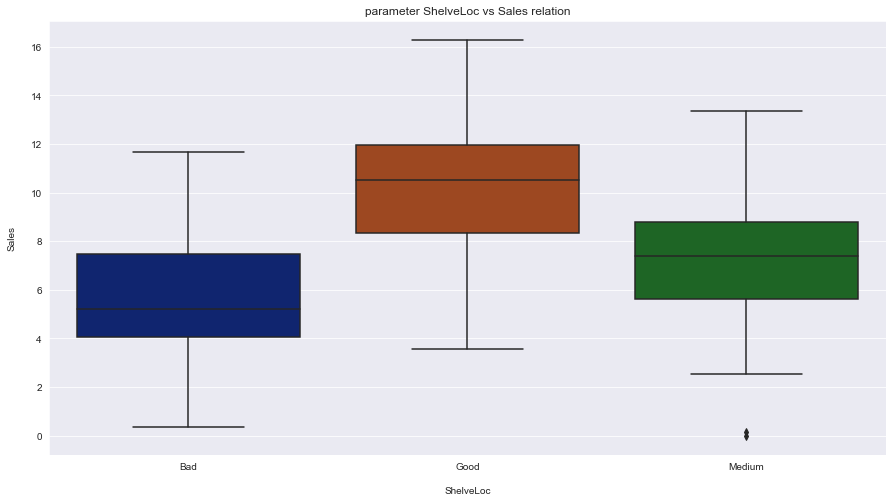

In [9]:
boxplot("ShelveLoc","Sales")

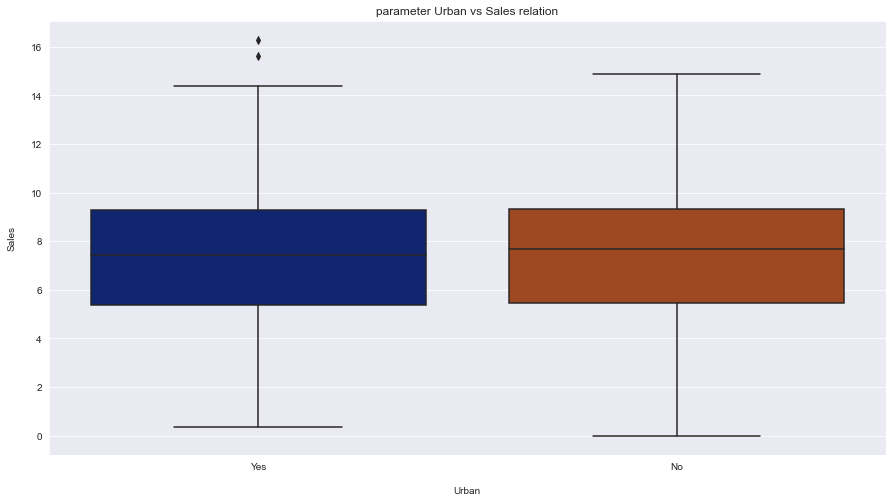

In [10]:
boxplot("Urban","Sales")

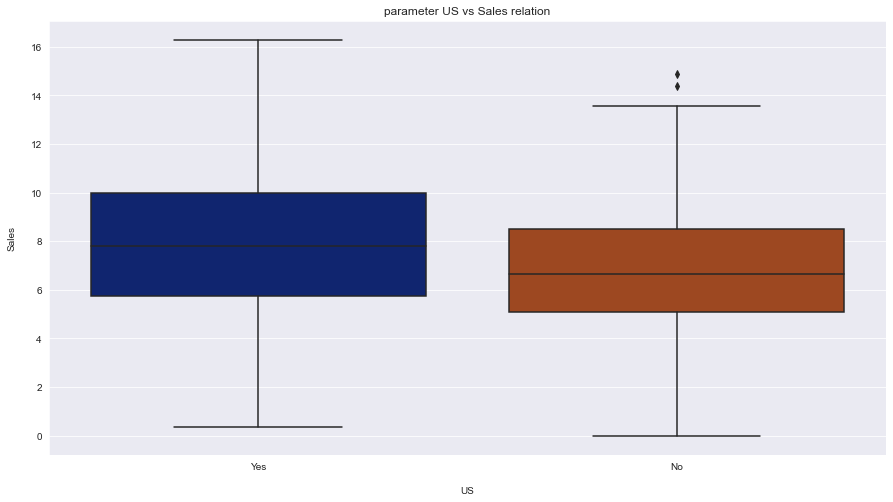

In [11]:
boxplot("US","Sales")

In [12]:
def factorplot(param):
    sns.factorplot(x =param, size = 7, aspect = 2, data = company_data, y= "Sales", palette = "dark")
    plt.xlabel("\n" + param)
    plt.ylabel("Sales\n")
    plt.show()

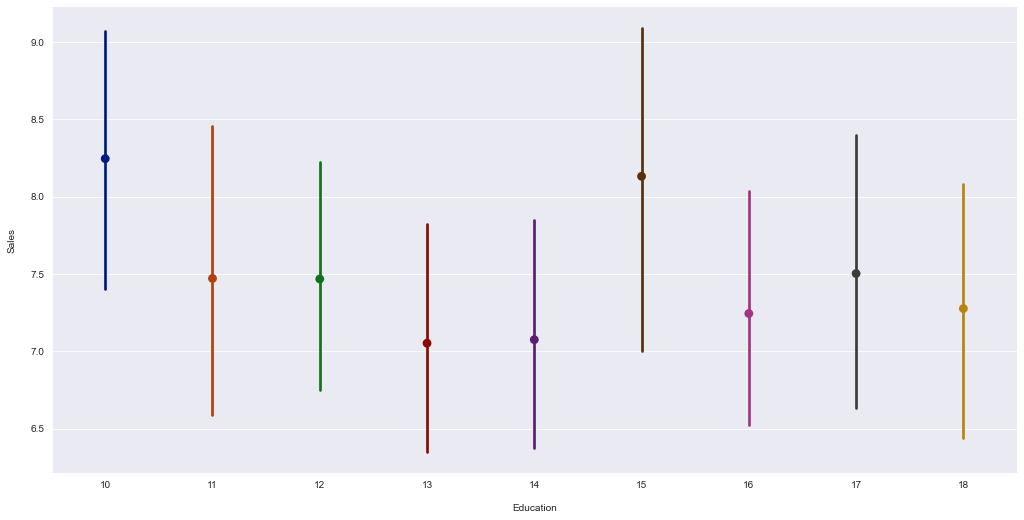

In [13]:
factorplot("Education")

In [14]:
def distplot(param):
    plt.figure(figsize=(20,8))
    sns.distplot(company_data[param], color = "grey", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()

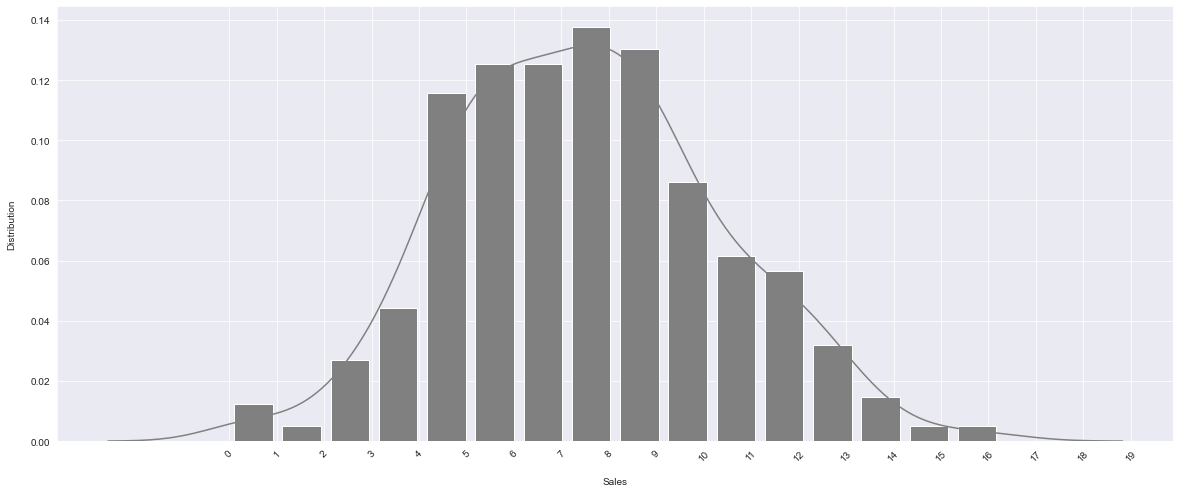

In [15]:
distplot("Sales")

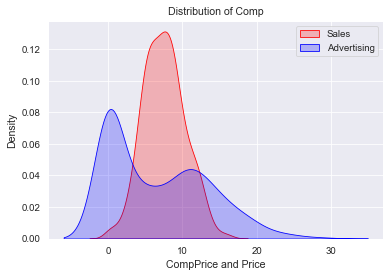

In [16]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(company_data.Sales,
                color="Red", shade = True);
ax = sns.kdeplot(company_data.Advertising,
                ax =ax, color="Blue", shade= True);
ax.legend(["Sales","Advertising"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('CompPrice and Price');
ax.set_title('Distribution of Comp');

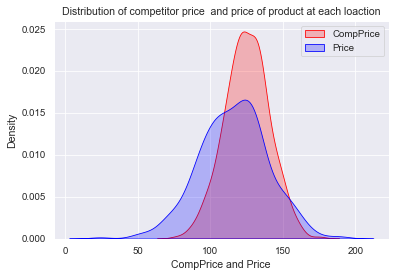

In [17]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(company_data.CompPrice,
                color="Red", shade = True);
ax = sns.kdeplot(company_data.Price,
                ax =ax, color="Blue", shade= True);
ax.legend(["CompPrice","Price"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('CompPrice and Price');
ax.set_title('Distribution of competitor price  and price of product at each loaction');

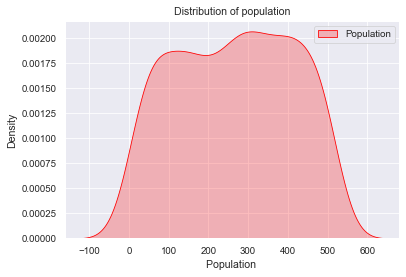

In [18]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(company_data.Population,
                color="Red", shade = True);
ax.legend(["Population"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Population ');
ax.set_title('Distribution of population');

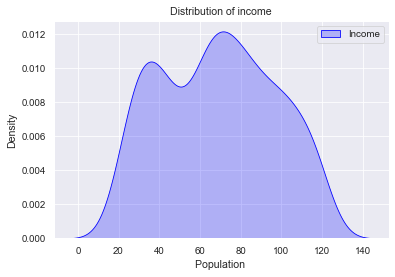

In [19]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(company_data.Income,
                color="Blue", shade = True);
ax.legend(["Income"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Population ');
ax.set_title('Distribution of income');

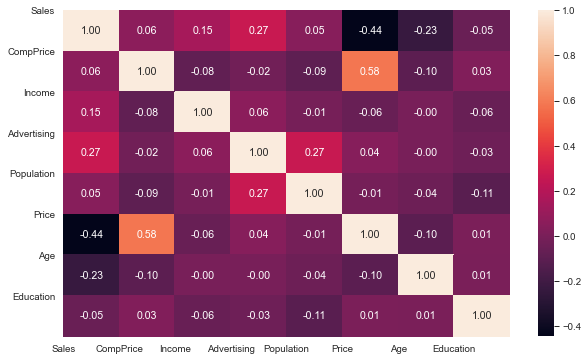

In [20]:
corr = company_data.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [21]:
company_data

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [22]:
"""#Create a label encoder object
le = LabelEncoder()
data = company_data.copy()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 3:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))"""


"#Create a label encoder object\nle = LabelEncoder()\ndata = company_data.copy()\n# Label Encoding will be used for columns with 2 or less unique values\nle_count = 0\nfor col in data.columns[1:]:\n    if data[col].dtype == 'object':\n        if len(list(data[col].unique())) <= 3:\n            le.fit(data[col])\n            data[col] = le.transform(data[col])\n            le_count += 1\nprint('{} columns were label encoded.'.format(le_count))"

In [23]:
data_ = company_data.copy()
data = pd.get_dummies(data_.iloc[:,1:])
data.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

Text(0.5, 1.0, 'Correlation with Sales \n')

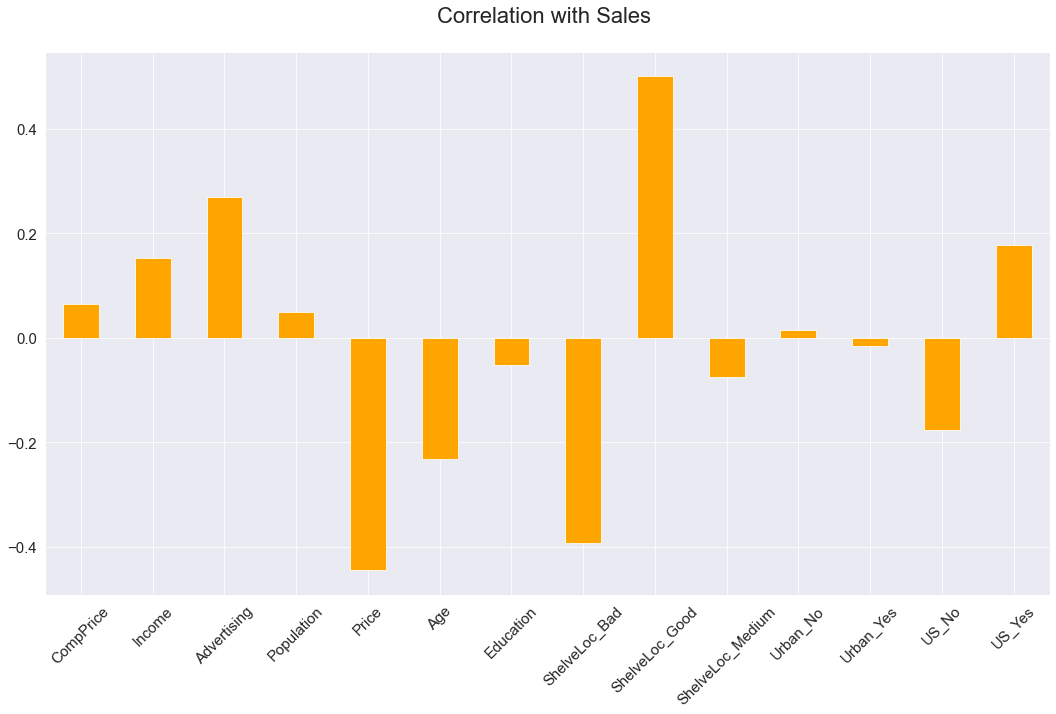

In [24]:
data2 = data.copy()

correlations = data2.corrwith(data_.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Sales \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [25]:
data['Sales'] = pd.cut(x=data_['Sales'],bins=[0, 6, 12, 18], labels=['Low','Medium', 'High'], right = False)
data_tree = data.copy()

In [26]:
type_ = ["Medium", "Low", "High"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=data['Sales'].value_counts(), name="Sales"))

fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sales Distributions",
   
    annotations=[dict(text='Sales', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

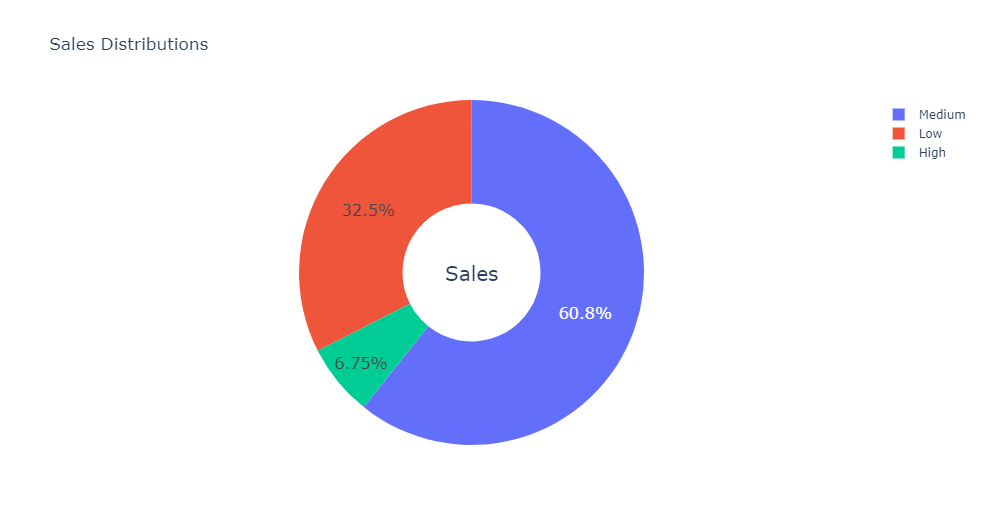

In [27]:
le = LabelEncoder()
le.fit(data["Sales"])
data["Sales"]=le.transform(data["Sales"])
data.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  Sales  
0      0       1      2  
1      0       1      2  
2      0       1      2  
3      0       1      2  
4      1       0      1

In [28]:
# split into input (X) and output (y) variables
X = data.iloc[:, :-1]

y=  data.Sales


In [29]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_regression




In [30]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [31]:
scores = fit.scores_

features = fit.transform(X)

In [32]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df

Score           Feature
0     3.898322         CompPrice
1    80.520134            Income
2   144.508146       Advertising
3     0.152363        Population
4   249.402227             Price
5    66.427476               Age
6     1.306335         Education
7    41.606838     ShelveLoc_Bad
8    61.724317    ShelveLoc_Good
9     5.141331  ShelveLoc_Medium
10    0.144231          Urban_No
11    0.060352         Urban_Yes
12    5.199105             US_No
13    2.861523            US_Yes

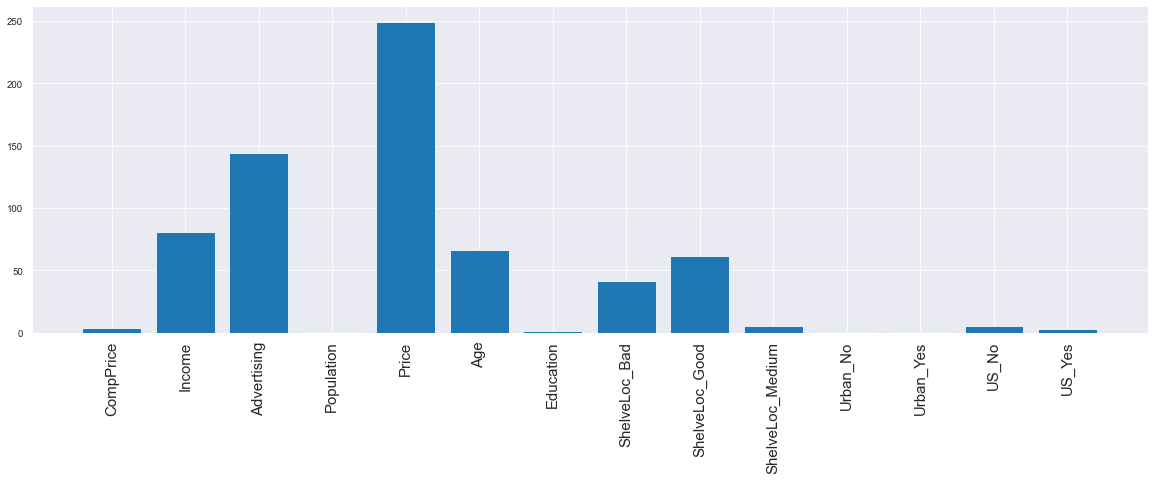

In [33]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

In [34]:
score_df.sort_values(by="Score", ascending=False)

Score           Feature
4   249.402227             Price
2   144.508146       Advertising
1    80.520134            Income
5    66.427476               Age
8    61.724317    ShelveLoc_Good
7    41.606838     ShelveLoc_Bad
12    5.199105             US_No
9     5.141331  ShelveLoc_Medium
0     3.898322         CompPrice
13    2.861523            US_Yes
6     1.306335         Education
3     0.152363        Population
10    0.144231          Urban_No
11    0.060352         Urban_Yes

In [35]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

X_ = norm_func(X)


In [36]:
model_data = X_[['Price', 'Advertising', 'Income', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Bad', 'ShelveLoc_Medium']]
model_data.head()

Price  Advertising    Income       Age  ShelveLoc_Good  ShelveLoc_Bad  \
0  0.574850     0.379310  0.525253  0.309091             0.0            1.0   
1  0.353293     0.551724  0.272727  0.727273             1.0            0.0   
2  0.335329     0.344828  0.141414  0.618182             0.0            0.0   
3  0.437126     0.137931  0.797980  0.545455             0.0            0.0   
4  0.622754     0.103448  0.434343  0.236364             0.0            1.0   

   ShelveLoc_Medium  
0               0.0  
1               0.0  
2               1.0  
3               1.0  
4               0.0

In [37]:
X_train, X_test, y_train, y_test = train_test_split(model_data, y, test_size=0.33, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_, y, test_size=0.33, random_state=1)

In [38]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (268, 7)
Shape of X_test:  (132, 7)
Shape of y_train:  (268,)
Shape of y_test:  (132,)


In [39]:
print('Shape of X_train2: ', X_train2.shape)
print('Shape of X_test2: ', X_test2.shape)
print('Shape of y_train2: ', y_train2.shape)
print('Shape of y_test2: ', y_test2.shape)

Shape of X_train2:  (268, 14)
Shape of X_test2:  (132, 14)
Shape of y_train2:  (268,)
Shape of y_test2:  (132,)


In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


In [41]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth= 5)
decision_tree.fit(X_train,y_train)
pred1 = decision_tree.predict(X_test)
accuracy_test1 = accuracy_score(y_test,pred1)
accuracy_test1

0.7045454545454546

<AxesSubplot:>

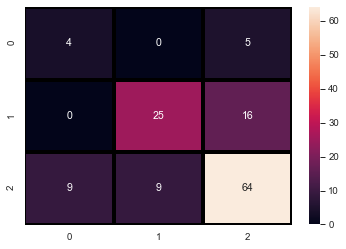

In [42]:
sns.heatmap(confusion_matrix(y_test, pred1),annot=True,fmt = "d",linecolor="k",linewidths=3)

In [43]:
model_data.columns

Index(['Price', 'Advertising', 'Income', 'Age', 'ShelveLoc_Good',
       'ShelveLoc_Bad', 'ShelveLoc_Medium'],
      dtype='object')

In [ ]:
"""from sklearn import tree
# Plotting Decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,16), dpi=600)
tree.plot_tree(decision_tree, feature_names = model_data.columns, 
               class_names=["Low","Medium","High"],
               filled = True);"""

In [49]:
kfold = KFold(n_splits=10, random_state=42)
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,20),
    "min_samples_split":range(1,20),
    "min_samples_leaf":range(1,20)
}

In [50]:
grid = GridSearchCV(decision_tree,
                   param_grid = param_dict,
                   cv=kfold,
                   verbose=1,
                   n_jobs=6)

grid.fit(X_train,y_train)

model1 = grid.best_estimator_


Fitting 10 folds for each of 13718 candidates, totalling 137180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 4468 tasks      | elapsed:    5.2s
[Parallel(n_jobs=6)]: Done 12468 tasks      | elapsed:   15.3s
[Parallel(n_jobs=6)]: Done 23668 tasks      | elapsed:   31.4s
[Parallel(n_jobs=6)]: Done 38068 tasks      | elapsed:   51.1s
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 76468 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 100468 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 127668 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 137180 out of 137180 | elapsed:  3.1min finished


In [51]:
grid.best_score_

0.7532763532763533

In [52]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 4}

In [53]:
predict_output = model1.predict(X_test)
accuracy_test_1 = accuracy_score(y_test,predict_output)
accuracy_test_1


0.6818181818181818

<AxesSubplot:>

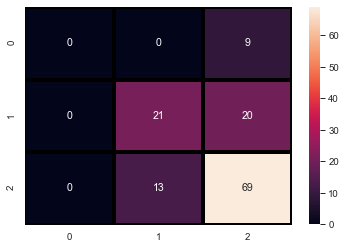

In [54]:
sns.heatmap(confusion_matrix(y_test, predict_output),annot=True,fmt = "d",linecolor="k",linewidths=3)

In [56]:
from sklearn.tree import export_graphviz 
from six import StringIO
import pydotplus
from IPython.display import Image

In [63]:
colnames = list(model_data.columns)
predictors = colnames[0:7]
target = data_tree.Sales
tree1 = grid.estimator
dot_data = StringIO()


In [64]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz/bin/'
export_graphviz(tree1,out_file = dot_data, 
                feature_names =predictors, 
                class_names = target, filled =True,
                rounded=True,impurity =False,proportion=False,precision =2)


In [65]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


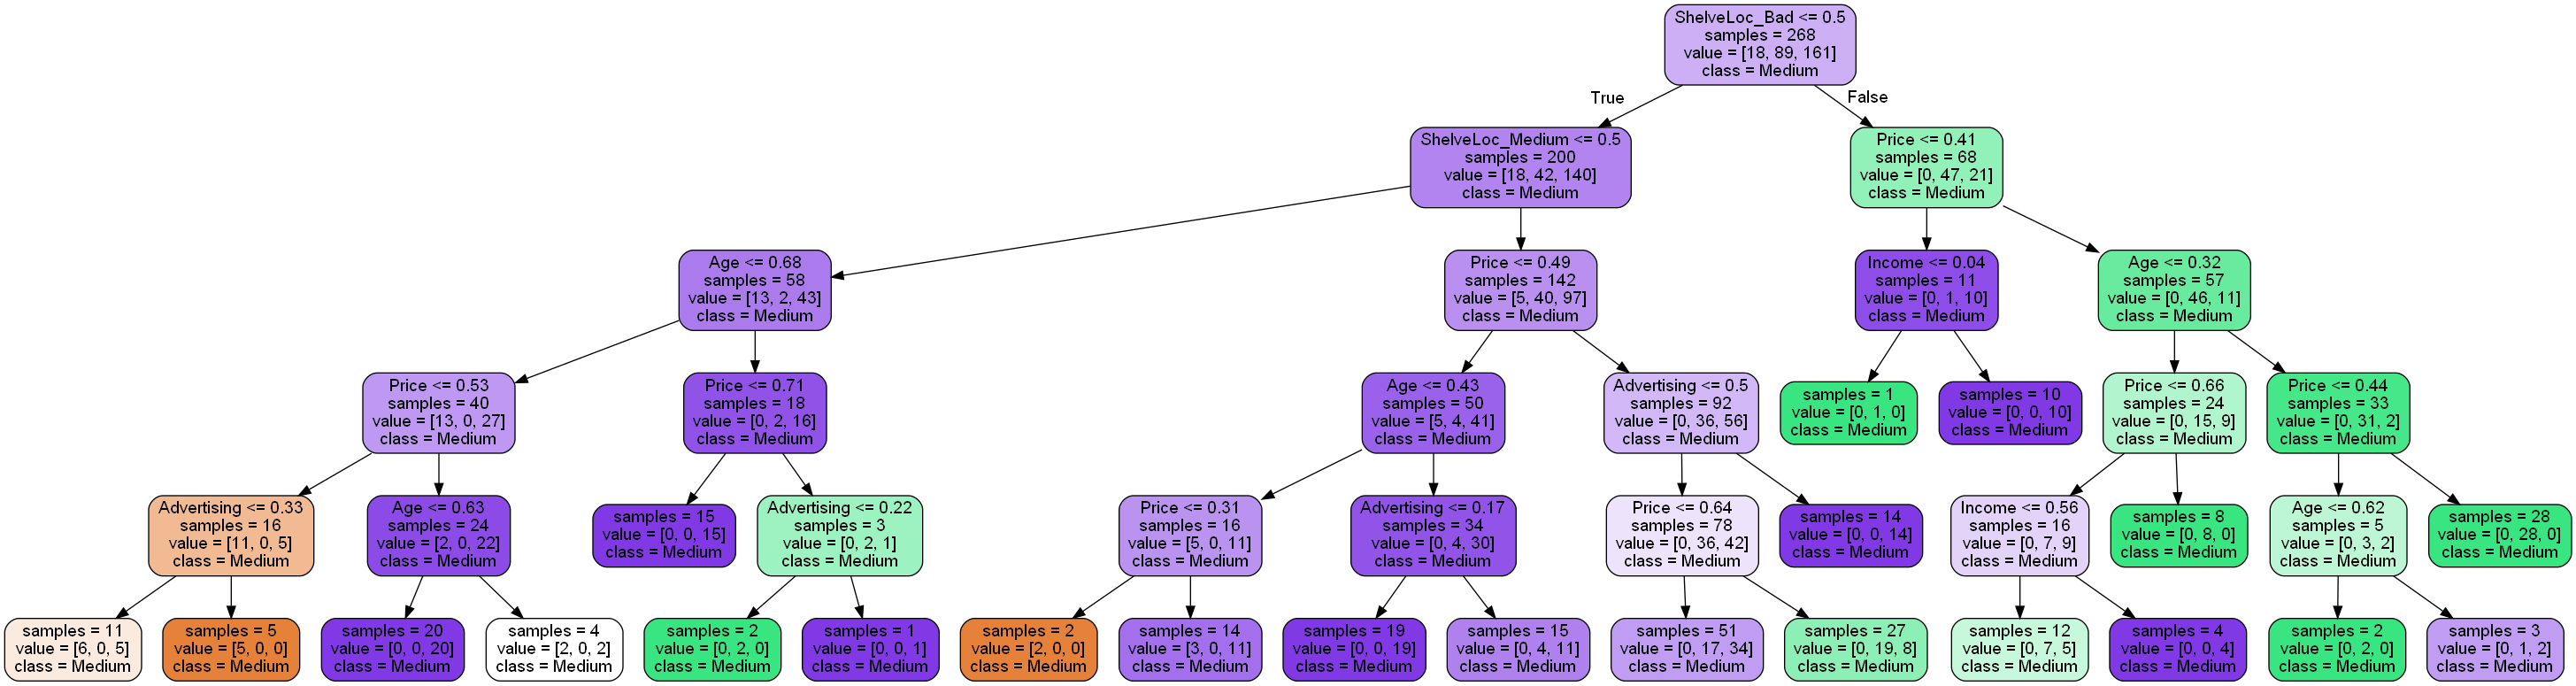

In [66]:
Image(graph.create_png())